In [1]:
# Input data
import numpy as np
from utilities import *

# test and train read
X_train_valid, Y_train_valid, list_ch_train_valid = read_data(data_path="../../datasets/har/har-data/", 
                                                              split="train")
X_test, Y_test, list_ch_test = read_data(data_path="../../datasets/har/har-data/", split="test")

assert list_ch_train_valid == list_ch_test, "Mistmatch in channels!"
assert Y_train_valid.max(axis=0) == Y_test.max(axis=0)

# print(np.mean(Y_train_valid==0), np.mean(Y_train_valid==1), np.mean(Y_train_valid==2), 
#       np.mean(Y_train_valid==3), np.mean(Y_train_valid==4), np.mean(Y_train_valid==5),
#       np.mean(Y_train_valid==6), np.mean(Y_train_valid==7))

In [2]:
# Normalizing/standardizing the input data features
X_train_valid_norm, X_test_norm = standardize(test=X_test, train=X_train_valid)
Y_train_valid_onehot = one_hot(labels=Y_train_valid.reshape(-1), n_class=6) 
Y_test_onehot = one_hot(labels=Y_test.reshape(-1), n_class=6) 

In [3]:
# Train and valid split
from sklearn.model_selection import train_test_split

X_train_norm, X_valid_norm, Y_train_onehot, Y_valid_onehot = train_test_split(X_train_valid_norm, 
                                                                              Y_train_valid_onehot,
                                                                              test_size=0.30)

# print(X_train_norm.shape, X_valid_norm.shape, Y_train_onehot.shape, Y_valid_onehot.shape)

In [4]:
## Hyperparameters
# Input data
# NWC for signal: N is batch size, W is the width/sequence length, and C is the number of channels
# NHWC for images: This is the same as signals and H stands for height
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial
print('batch_size, seq_len, n_channels', batch_size, seq_len, n_channels)

# Output labels
n_classes = Y_train_valid.max(axis=0)
assert Y_train_valid.max(axis=0) == Y_test.max(axis=0)
print('n_classes', n_classes)

# learning parameters
learning_rate = 0.0001 #1e-4
epochs = 10 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

batch_size, seq_len, n_channels 51 128 9
n_classes 6


In [5]:
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [25]:
# Feed the data from python/numpy to tensorflow framework
# NWC: number of samples or t, width or length of seq, and signal channels similar to images
# N is batch size; W is the width/window size/sequence length; C is the number of channels;
Xin = tf.placeholder(dtype=tf.float32, shape=[None, seq_len, n_channels], name = 'Xin')
Yout = tf.placeholder(dtype=tf.float32, shape=[None, n_classes], name = 'Yout')
keep_prob_= tf.placeholder(dtype=tf.float32, name = 'keep_prob_', shape=None)
learning_rate_ = tf.placeholder(dtype=tf.float32, name = 'learning_rate_', shape=None)
# Construct the LSTM inputs and LSTM cells

In [72]:
# # Successfully implemented!
# # Simple example of running it;
# # This is a simple example of using placeholder to define a tensor and feed it into the session
# # Also doing this, we can see how it might work using the session
# # tensor, varilable, and operation for generating an output for high performance computation
# Xexample = tf.placeholder(dtype=tf.float32, shape=(1024, 1024), name=None)
# Yexample = tf.matmul(a=Xexample, b=Xexample, name=None)

# with tf.Session() as sess:
# #   print(sess.run(y))  # ERROR: will fail because x was not fed.

# #     rand_array = np.random.rand(1024, 1024)
# #     Xin = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=Xexample.shape, stddev=1.)    
#     Xin = np.random.normal(loc=0., scale=1., size=Xexample.shape)
#     print(Xexample.shape)
#     print(Xin.shape, Xin.dtype)
#     Yout = sess.run(fetches=Yexample, feed_dict={Xexample: Xin})
#     print(Yout.shape, Yout.dtype, Yexample.shape, Yexample.dtype)  # Will succeed.

In [73]:
# Successfull!
# print(inputs_.shape, inputs_.dtype, inputs_.shape[0], inputs_.shape[1], inputs_.shape[2])
# # NWC=?, 128, 9
# width, in_ch, out_ch = inputs_.shape[1]//4, inputs_.shape[2], inputs_.shape[2]*2
# # print(width, in_ch, out_ch)
# filter_shape=[width.value, in_ch.value, out_ch.value]
# print(filter_shape)
# init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, stddev=1., shape=filter_shape)
# # print(init_val.shape, init_val.dtype)
# # filters = tf.get_variable(shape=[width, in_ch, out_ch], name='conv1d1', dtype=tf.float32, trainable=True)
# filter1 = tf.Variable(initial_value=init_val, dtype=tf.float32, name=None, trainable=True)
# conv1d = tf.nn.conv1d(data_format='NWC', filters=filter1, name=None, padding='SAME', stride=2,
#                       use_cudnn_on_gpu=True, value=inputs_)
# print(conv1d.shape, conv1d.dtype)
# filterT = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
# print(filterT.shape, filterT.dtype)
# output_shape = [batch_size, inputs_.shape[1].value, inputs_.shape[2].value]
# print(output_shape)
# conv1dT = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=filterT, name=None, output_shape=output_shape, 
#                                          padding='SAME', stride=2, value=conv1d)
# print(conv1dT.shape, conv1d.dtype)

In [78]:
# Successfull!
# # This is explaining a single operation on input tensors and varilables to generate the output tensor
# # The pull request is open as of this moment, so the API and behavior can and probably will change. 
# # Some feature that one might expect from conv1d_transpose aren't supported:

# # output_shape requires batch size to be known statically, can't pass -1;
# # on the other hand, output shape is dynamic (this explains None dimension).
# # Also, the kernel_width=7 expects in_width=255, not 256. 
# # Should make kernel_width less than 4 to match in_width=256. 
# # The result is this demo code:
# Xexample = tf.placeholder(shape=[None, 256, 16], dtype=tf.float32, name=None)
# print(Xexample.shape, Xexample.dtype)
# [kernel_width, output_depth, input_depth] = [Xexample.shape[1].value//4, Xexample.shape[2].value//2, 
#                                              Xexample.shape[2].value]
# shape = [kernel_width, output_depth, input_depth] 
# print(shape)
# init_val = tf.random_normal(shape=shape, dtype=tf.float32, mean=0., name=None, stddev=1.)
# Wexample = tf.Variable(initial_value=init_val, dtype=tf.float32, name=None, trainable=True)
# print(Wexample.shape, Wexample.dtype)
# # output shape is based on NWC: batch size, width, and Channels
# stride = 4
# shape = [1, Xexample.shape[1].value*stride, Wexample.shape[1].value] 
# print(shape)
# Yexample = tf.contrib.nn.conv1d_transpose(value=Xexample, filter=Wexample, output_shape=shape, data_format='NWC',
#                                      name=None, stride=4, padding='SAME')
# # both paddings 'SAME' or 'VALID' work # any difference?
# print(Yexample.shape, Yexample.dtype)

# with tf.Session() as sess:
#     sess.run(fetches=tf.global_variables_initializer())
#     print(Xexample.shape)
#     shape = [Yexample.shape[0].value, Xexample.shape[1].value, Xexample.shape[2].value]
#     print(shape)
#     Xin = np.random.normal(loc=0., scale=1., size=shape) 
#     Yout = sess.run(fetches=Yexample, feed_dict={Xexample: Xin})
#     print(Yout.shape, Yout.dtype)

(?, 256, 16) <dtype: 'float32'>
[64, 8, 16]
(64, 8, 16) <dtype: 'float32_ref'>
[1, 1024, 8]
(1, 1024, 8) <dtype: 'float32'>
(?, 256, 16)
[1, 256, 16]
(1, 1024, 8) float32


In [7]:
# batch_size, seq_len, n_channels: 51 128 9; n_classes: 6
# (batch, 128, 9) --> (batch, 256, 18)
# conv same
# pool same: (128-2+0)/2 + 1 = (126/2)+1 = 63 + 1=64
conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_1 = tf.layers.max_pooling1d(inputs=conv1, pool_size=2, strides=2, padding='same')
# max_pool_1 = tf.nn.dropout(max_pool_1, keep_prob=keep_prob_)
print('inputs_.shape, conv1.shape, max_pool_1.shape', inputs_.shape, conv1.shape, max_pool_1.shape)

# (batch, 64, 18) --> (batch, 32, 36)
# conv same
# pool same: (64-2+0)/2 + 1 = (62/2)+1 = 31 + 1=32
conv2 = tf.layers.conv1d(inputs=max_pool_1, filters=36, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_2 = tf.layers.max_pooling1d(inputs=conv2, pool_size=2, strides=2, padding='same')
# max_pool_2 = tf.nn.dropout(max_pool_2, keep_prob=keep_prob_)
print('max_pool_1.shape, conv2.shape, max_pool_2.shape', max_pool_1.shape, conv2.shape, max_pool_2.shape)

# (batch, 32, 36) --> (batch, 16, 72)
# conv same
# pool same: (32-2+0)/2 + 1 = (30/2)+1 = 15 + 1=16
conv3 = tf.layers.conv1d(inputs=max_pool_2, filters=72, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_3 = tf.layers.max_pooling1d(inputs=conv3, pool_size=2, strides=2, padding='same')
# max_pool_3 = tf.nn.dropout(max_pool_3, keep_prob=keep_prob_)
print('max_pool_2.shape, conv3.shape, max_pool_3.shape', max_pool_2.shape, conv3.shape, max_pool_3.shape)

# (batch, 16, 72) --> (batch, 8, 144)
# conv same
# pool same: (16-2+0)/2 + 1 = (14/2)+1 = 7 + 1=8
conv4 = tf.layers.conv1d(inputs=max_pool_3, filters=144, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_4 = tf.layers.max_pooling1d(inputs=conv4, pool_size=2, strides=2, padding='same')
# max_pool_4 = tf.nn.dropout(max_pool_4, keep_prob=keep_prob_)
print('max_pool_3.shape, conv4.shape, max_pool_4.shape', max_pool_3.shape, conv4.shape, max_pool_4.shape)

# Flatten and add dropout + predicted output
flat = tf.reshape(max_pool_4, (-1, 8*144))
flat = tf.nn.dropout(flat, keep_prob=keep_prob_)
logits = tf.layers.dense(flat, n_classes)
print('max_pool_4.shape, flat.shape, logits.shape', max_pool_4.shape, flat.shape, logits.shape)

ValueError: Input 0 of layer conv2d_1 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 128, 9]

In [11]:
# Backward pass: error backpropagation
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)
print('cost_tensor, cost', cost_tensor, cost)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)
print('optimizer', optimizer)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
print('correct_pred, accuracy', correct_pred, accuracy)

# Confusion matrix
confusion_matrix = tf.confusion_matrix(predictions=tf.argmax(logits, 1),
                                       labels=tf.argmax(labels_, 1))
print('confusion_matrix', confusion_matrix)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

cost_tensor, cost Tensor("softmax_cross_entropy_with_logits_sg/Reshape_2:0", shape=(?,), dtype=float32) Tensor("Mean:0", shape=(), dtype=float32)
optimizer name: "Adam"
op: "NoOp"
input: "^Adam/update_conv1d_4/kernel/ApplyAdam"
input: "^Adam/update_conv1d_4/bias/ApplyAdam"
input: "^Adam/update_conv1d_5/kernel/ApplyAdam"
input: "^Adam/update_conv1d_5/bias/ApplyAdam"
input: "^Adam/update_conv1d_6/kernel/ApplyAdam"
input: "^Adam/update_conv1d_6/bias/ApplyAdam"
input: "^Adam/update_conv1d_7/kernel/ApplyAdam"
input: "^Adam/update_conv1d_7/bias/ApplyAdam"
input: "^Adam/update_dense_1/kernel/ApplyAdam"
input: "^Adam/update_dense_1/bias/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"

correct_pred, accuracy Tensor("Equal:0", shape=(?,), dtype=bool) Tensor("accuracy:0", shape=(), dtype=float32)
confu

In [12]:
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []

# Save the training result or trained and validated model params
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
   
    # Loop over epochs
    for e in range(epochs):
        # Initialize 
        
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            ######################## Training
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)

        # Print info for every/each iter/epoch
        print("Epoch: {}/{}".format(e+1, epochs),
              "Train loss: {:6f}".format(np.mean(train_loss)))
        
#             ################## Validation
#             state_valid = sess.run(cell.zero_state(batch_size, tf.float32))
#             acc_batch = []
#             loss_batch = []    
#             # Loop over batches
#             for x, y in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

#                 # Feed dictionary
#                 feed = {inputs_ : x, labels_ : y, keep_prob_ : 1.0, initial_state : state_valid}

#                 # Loss
#                 loss, state_valid, acc = sess.run([cost, final_state, accuracy], feed_dict = feed)
#                 acc_batch.append(acc)
#                 loss_batch.append(loss)

#             # Store
#             valid_acc.append(np.mean(acc_batch))
#             valid_loss.append(np.mean(loss_batch))
            
#         # Print info for every iter/epoch
#         print("Epoch: {}/{}".format(e+1, epochs),
#               "Train loss: {:6f}".format(np.mean(train_loss)),
#               "Valid loss: {:.6f}".format(np.mean(valid_loss)),
#               "Train acc: {:6f}".format(np.mean(train_acc)),
#               "Valid acc: {:.6f}".format(np.mean(valid_acc)))
                
#     saver.save(sess,"checkpoints/dcnn-lstm-har.ckpt")

Epoch: 1/10 Train loss: 1.544189
Epoch: 2/10 Train loss: 1.368851
Epoch: 3/10 Train loss: 1.225809
Epoch: 4/10 Train loss: 1.080163
Epoch: 5/10 Train loss: 0.953149
Epoch: 6/10 Train loss: 0.853043
Epoch: 7/10 Train loss: 0.774175
Epoch: 8/10 Train loss: 0.709866
Epoch: 9/10 Train loss: 0.656304
Epoch: 10/10 Train loss: 0.611758


In [29]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='har train_loss')
mplot.plot(valid_loss, label='har valid_loss')
mplot.legend()
mplot.show()

<Figure size 640x480 with 1 Axes>

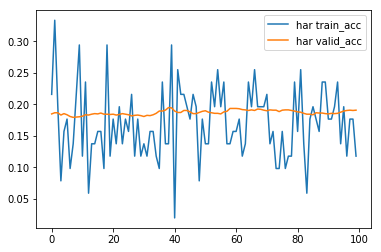

In [14]:
# import matplotlib.pyplot as mplot
mplot.plot(train_acc, label='har train_acc')
mplot.plot(valid_acc, label='har valid_acc')
mplot.legend()
mplot.show()

In [15]:
test_acc, test_loss = [], []

with tf.Session() as sess:
    # Restore the validated model
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    ################## Test
    state = sess.run(cell.zero_state(batch_size, tf.float32))
    acc_batch = []
    loss_batch = []    
    # Loop over batches
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_ : x, labels_ : y, keep_prob_ : 1.0, initial_state : state}

        # Loss
        loss, state, acc = sess.run([cost, final_state, accuracy], feed_dict = feed)
        acc_batch.append(acc)
        loss_batch.append(loss)

    # Store
    test_acc.append(np.mean(acc_batch))
    test_loss.append(np.mean(loss_batch))

    # Print info for every iter/epoch
    print("Test loss: {:6f}".format(np.mean(test_loss)),
          "Test acc: {:.6f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints/dcnn-lstm-har.ckpt
Test loss: 1.733549 Test acc: 0.251806
